
# BIOF395 Final Project — Sentiment Analysis of Movie Reviews

**Name:** Jonathan "Johnny" Uriarte-Lopez  
**Course:** BIOF395 (Introduction to Text Mining    )
**Project Title:** Binary Sentiment Classification: Positive vs. Negative Movie Reviews  
**Dataset:** Cornell Movie Review Polarity Dataset v2.0    
**Link:** http://www.cs.cornell.edu/people/pabo/movie-review-data/  


# Text mining problem description
Write a couple of paragraphs to describe (1) which text mining problem you are working on (e.g., text classification) and (2) why it is important to use text mining techniques to address

**Johnny Response**.   

My dataset will come from the the movie review data from CS Cornell.
* [Link to cs cornell movie review webstie](https://www.cs.cornell.edu/people/pabo/movie-review-data/)

I will attempt to use sentiment classification on this dataset. Sentiment classification is the process of using natural language processing (NLP) to identify and categorize emotions in text. We will use the sklearn, pandas, and other python packages for this analysis.

It is important to use this text mining technique to answer to help people decide which movie they want to watch. Movies are entertaining and can inspire us. Movies take up a large chunk of our time, and we rather not wast that time watching a poorly created movie. These reviews from others will help guide us in deciding what movie we want to watch on our streaming platforms. On a larger industry scale, these reviews can help directors, actors, and film staff learn from good and bad examples of films. Is the issue the story? The acting? The pacing of the film? The CGI (computer generated images) or props? It is tough to take criticisms, but brutally honest advice can help you make better movies.

# Dataset Description
Write a couple of paragraphs to describe (1) the dataset that you are working on and (2) how was the dataset created (e.g., manually created by curators)

**Johnny Response**

My dataset will come from the the movie review data from CS Cornell.
* [Link to cs cornell movie review webstie](https://www.cs.cornell.edu/people/pabo/movie-review-data/)

It was created by Bo Pang and Lillian Lee from Cornell University. The movie review data came from the IMBd (Internet Movie Database) archive. They sourced a pool of unprocessed source documents in the form of html files. The data was then streamlined into one central .tar.gz file.

The initial reviews were givin a rating of positive or negative review (1 and 0 respectively). The data is stored in a large .tar.gz zip file for ease of use and accessibility.


# Text Processing
1. Write codes to perform text processing and explain your decisions (e.g., why you use stemming)
2. Write codes to perform basic explorations on the dataset and briefly explain what you have found

**Johnny Response**

Look at code down below

# Text Models
Write codes to build your text model(s) and explain your decisions
(Start) Code Analysis Section

**Johnny Response**

Look at code down below

# 0. Start of NLP analysis code

## 1. Introduction to the code
We will use the Cornell Movie Review Polarity Dataset v2.0 dataset. Then we will use NLP text processing techniques to analyze the movie reviews. Code comments and links to references will be provided to enchance understanding. This stuff is hard, so any extra references can help us all learn.

## 2. Setup and Imports

In [ ]:
# Install/upgrade these packages locally.
# They are usually already available in the Colab.

##### uncomment below if you need to install stuff
# !pip install nltk scikit-learn matplotlib tqdm --quiet

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm # progress bar
import matplotlib.pyplot as plt # visuals

# Path stuff
import os
import glob

# NLP stuff
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# ML/DL/AI stuff
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier

from sklearn.metrics import ( # you can get multiple functions in this cool way
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## 3. Dataset Download and Loading
Using some good ol bash commands.
Since I only need to download one file this works.
If it was mutliple files, I would have needed to do some batch processing. Lucky for me, it's simple :)

In [ ]:
# Download the Cornell polarity dataset (review_polarity.tar.gz)
# If this file is already present (e.g., from a previous run), this will simply overwrite it.
## we will be using some good ol' bash commands to get the data
## The data will be stored in the google temp folder area -- use path logic if you're really curious on where it's stored

!wget -q https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz -O review_polarity.tar.gz

# Extract the tar.gz archive
!tar -xzf review_polarity.tar.gz

# The extracted data lives in txt_sentoken/neg and txt_sentoken/pos
print(os.listdir('.'))
print('Subdirectories in txt_sentoken:', os.listdir('txt_sentoken'))


['.config', 'txt_sentoken', 'poldata.README.2.0', 'review_polarity.tar.gz', 'sample_data']
Subdirectories in txt_sentoken: ['pos', 'neg']


In [ ]:
# example of bash commands in google collab
!ls

poldata.README.2.0  review_polarity.tar.gz  sample_data  txt_sentoken


In [ ]:
# all the text tiles from the extracted tar.gz file
!ls txt_sentoken/pos

cv000_29590.txt  cv250_25616.txt  cv500_10251.txt  cv750_10180.txt
cv001_18431.txt  cv251_22636.txt  cv501_11657.txt  cv751_15719.txt
cv002_15918.txt  cv252_23779.txt  cv502_10406.txt  cv752_24155.txt
cv003_11664.txt  cv253_10077.txt  cv503_10558.txt  cv753_10875.txt
cv004_11636.txt  cv254_6027.txt   cv504_29243.txt  cv754_7216.txt
cv005_29443.txt  cv255_13683.txt  cv505_12090.txt  cv755_23616.txt
cv006_15448.txt  cv256_14740.txt  cv506_15956.txt  cv756_22540.txt
cv007_4968.txt	 cv257_10975.txt  cv507_9220.txt   cv757_10189.txt
cv008_29435.txt  cv258_5792.txt   cv508_16006.txt  cv758_9671.txt
cv009_29592.txt  cv259_10934.txt  cv509_15888.txt  cv759_13522.txt
cv010_29198.txt  cv260_13959.txt  cv510_23360.txt  cv760_8597.txt
cv011_12166.txt  cv261_10954.txt  cv511_10132.txt  cv761_12620.txt
cv012_29576.txt  cv262_12649.txt  cv512_15965.txt  cv762_13927.txt
cv013_10159.txt  cv263_19259.txt  cv513_6923.txt   cv763_14729.txt
cv014_13924.txt  cv264_12801.txt  cv514_11187.txt  cv764_11739.txt

In [ ]:
# since we're using google collab, pay extra attention to your google drive paths
## sometimes, files are not in the place you expect
## When in doubt, use ls bash commands (! ls) in separate code blocks

# this load reviews def combines all the text files into one big dataframe
# you may have to modify the encoding variable if the text isn't read correctly with the 'with open()' command

def load_reviews(path, label):
    '''Load all .txt files from a given folder and assign the same label.'''
    files = glob.glob(os.path.join(path, '*.txt')) # path of extracted tar.gz files
    texts = [] # empty placeholder for where we will store the info
    for fpath in files:
        with open(fpath, 'r', encoding='latin-1') as f: # you might need to change the latin-1 if this fails for you -JU
            texts.append(f.read())
    return pd.DataFrame({'review': texts, 'label': label})

df_pos = load_reviews('txt_sentoken/pos', 1)  # positive reviews labeled 1 according to the website
df_neg = load_reviews('txt_sentoken/neg', 0)  # negative reviews labeled 0 according to the website

df = pd.concat([df_pos, df_neg], ignore_index=True) # the data doesn't come in nice, so concat to combine the thing together -JU
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

print('Dataset shape:', df.shape)
df.head()


Dataset shape: (2000, 2)


,review,label
0,""" showgirls "" is the first big-budget , big-s...",0
1,everyone knows someone like giles de'ath : stu...,1
2,"well , as i check my score card for what i've ...",0
3,i actually am a fan of the original 1961 or so...,1
4,reindeer games is easily the worst of the thre...,0


## 4. Exploratory Data Analysis
Just to get an idea on what the data looks like.

label
0    1000
1    1000
Name: count, dtype: int64


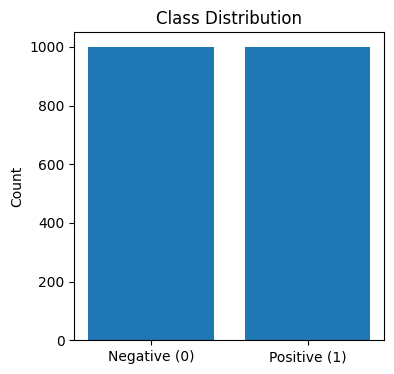

In [ ]:
# Class distribution
label_counts = df['label'].value_counts().sort_index()
print(label_counts)

plt.figure(figsize=(4, 4))
plt.bar(['Negative (0)', 'Positive (1)'], label_counts.values)
plt.title('Class Distribution')
plt.ylabel('Count')
plt.show()



## 5. Text Preprocessing

Steps applied to each review:

1. Lowercasing  
2. Tokenization  
3. Removal of non-alphabetic tokens  
4. Stopword removal  
5. Lemmatization  

The result is a cleaned
string for each review.

We will put this all in one simple def for reusability.


In [ ]:
stop_words = set(stopwords.words('english')) # figure out how to do this in spanish in the future -JU
lemm = WordNetLemmatizer()

# similar to what the prof showed us in lecture
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Keep alphabetic tokens only
    tokens = [t for t in tokens if t.isalpha()] #.isalpha for letters, .isnum for nums, .isalphanum for non special characters
    # Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    # Lemmatize
    tokens = [lemm.lemmatize(t) for t in tokens]
    return ' '.join(tokens) # this step I stole from the prof. To combine split words -JU

# Apply preprocessing with a progress bar
tqdm.pandas()
df['cleaned'] = df['review'].progress_apply(preprocess_text)

df[['review', 'cleaned', 'label']].head()


100%|██████████| 2000/2000 [00:46<00:00, 42.68it/s] 


,review,cleaned,label
0,""" showgirls "" is the first big-budget , big-s...",showgirl first film receive rating release las...,0
1,everyone knows someone like giles de'ath : stu...,everyone know someone like giles stuffy arroga...,1
2,"well , as i check my score card for what i've ...",well check score card done holiday weekend rea...,0
3,i actually am a fan of the original 1961 or so...,actually fan original flick name starring hayl...,1
4,reindeer games is easily the worst of the thre...,reindeer game easily worst three recent film p...,0


## 6. Train–Test Split

In [ ]:
X = df['cleaned']
y = df['label']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print('Training size:', X_train.shape[0])
print('Test size:', X_test.shape[0])


Training size: 1600
Test size: 400


## 7. Text Representation with Term Frequency Inverse Document Frequency (TF–IDF)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape


((1600, 5000), (400, 5000))

## 8. Model Training and Evaluation
precision, recall, and F1-score documentation for the variable: [P_R_F1 link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)

This combines all the individual score commands into one useful function (wonderful for the lazy data scientists).

In [ ]:
# note for Johnny, you did this back in your ML/DL class
## It just combines the steps into one def -JU
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    '''
    Fit model, make predictions, and print evaluation metrics.
    First, we will do the model fits with X train & y train.

    '''
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=1)

    print(f'=== {name} ===')
    print(f'Accuracy : {acc:.4f}') # the .4f only grabs the first 4 digits of the output
    print(f'Precision: {precision:.4f}')
    print(f'Recall   : {recall:.4f}')
    print(f'F1-score : {f1:.4f}')
    print('\nClassification Report:\n')
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

    return y_pred


### 8.1 Baseline Model (Dummy Classifier)
This is just a random guessing to see how it'll perform.

In [ ]:
# test with dummy classifier
## also to make sure that your python packages are working
dummy = DummyClassifier(strategy='most_frequent')
y_dummy = evaluate_model('Dummy (Most Frequent Class)', dummy, X_train_tfidf, y_train, X_test_tfidf, y_test)


=== Dummy (Most Frequent Class) ===
Accuracy : 0.5000
Precision: 0.0000
Recall   : 0.0000
F1-score : 0.0000

Classification Report:

              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67       200
    Positive       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

### 8.2 Logistic Regression

In [ ]:
# go-live with logistic regression
lr = LogisticRegression(max_iter=300)
y_lr = evaluate_model('Logistic Regression', lr, X_train_tfidf, y_train, X_test_tfidf, y_test)


=== Logistic Regression ===
Accuracy : 0.8175
Precision: 0.8191
Recall   : 0.8150
F1-score : 0.8170

Classification Report:

              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82       200
    Positive       0.82      0.81      0.82       200

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



### 8.3 Linear SVM

In [ ]:
# go-live with Support Vector Machine (SVM)
svm = LinearSVC()
y_svm = evaluate_model('Linear SVM', svm, X_train_tfidf, y_train, X_test_tfidf, y_test)


=== Linear SVM ===
Accuracy : 0.8425
Precision: 0.8549
Recall   : 0.8250
F1-score : 0.8397

Classification Report:

              precision    recall  f1-score   support

    Negative       0.83      0.86      0.85       200
    Positive       0.85      0.82      0.84       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



### 8.4 Multinomial Naive Bayes

In [ ]:
# go-live with native bayes
# nb for native bayes
nb = MultinomialNB()
y_nb = evaluate_model('Multinomial Naive Bayes', nb, X_train_tfidf, y_train, X_test_tfidf, y_test)


=== Multinomial Naive Bayes ===
Accuracy : 0.8175
Precision: 0.8256
Recall   : 0.8050
F1-score : 0.8152

Classification Report:

              precision    recall  f1-score   support

    Negative       0.81      0.83      0.82       200
    Positive       0.83      0.81      0.82       200

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



# Evaluations (Error Analysis)
Write codes to evaluate the performance of your model(s) and describe what evaluation metrics are used and why. Conduct error analysis and update the previous steps if necessary.


## 9. Confusion Matrix for Best Model (Error Analysis)
Good link to learn how to make confusion matrix: [w3 confusion matrix tutorial](https://www.w3schools.com/python/python_ml_confusion_matrix.asp)

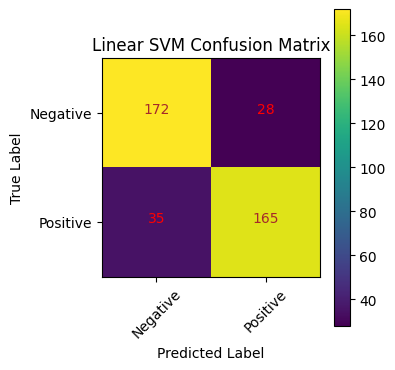

In [ ]:
# Here we assume SVM is the best-performing model based on the metrics above.
best_model_name = 'Linear SVM'
y_best = y_svm

cm = confusion_matrix(y_test, y_best)

plt.figure(figsize=(4, 4))
plt.imshow(cm, interpolation='nearest')
plt.title(f'{best_model_name} Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment='center',
                 color='brown' if cm[i, j] > thresh else 'red')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


## 10. ROC Curves (Error Analysis)
For future Johnny or other people who want to plot ROC curves. Here is the link to the ROC curve plot documention from the scikit learn website: [Link to documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

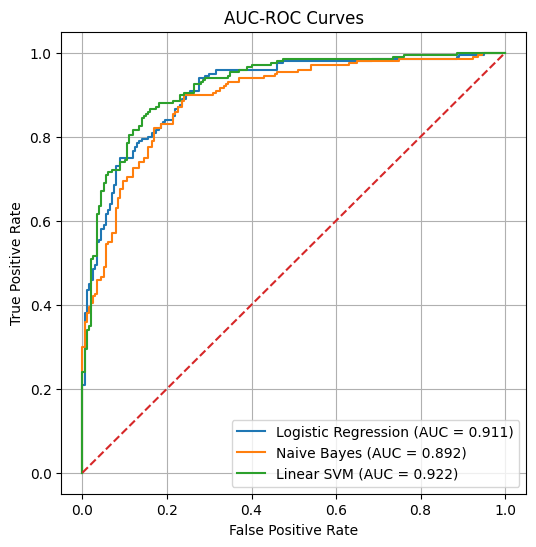

In [ ]:
plt.figure(figsize=(6, 6))

# Logistic Regression ROC

y_lr_prob = lr.predict_proba(X_test_tfidf)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')

# Naive Bayes ROC
y_nb_prob = nb.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_nb_prob)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.3f})')

# SVM ROC
y_svm_score = svm.decision_function(X_test_tfidf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_score)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Linear SVM (AUC = {roc_auc_svm:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# 11. Critical Analysis and Conclusion




The sentiment classification pipeline to categorize movie reviews as positive or negative was a success. Term Frequency-Inverse Document Frequency (TF-IDF) was utilized for text representation. The data processed with TF-IDF was feed into three separate machine learning models.

Here are the three models and their accuracy:
* **Logistic Regression**: ~81.75%
* **Multinomial Naive Bayes**: ~81.75%
* **Linear Support Vector Machine (SVM)**: ~84.25%

Based on the accuracy results, Linear SVM was the best model for this dataset. Since the text data was linearly separated after preprocessing, SVM was able to maximize the margin between positive and negative reviews in the movie review.

Despite the model success, if you were to look at the confusion matrix the model still makes mistakes. Even with the most advance natural language processing (NLP) techniques, it's difficult to decipher tone of voice in reviews. It's difficult for a machine to denote sarcasm or satire. A human can read in between the lines, but it's much harder for a machine to do so.

To improve this project, we can use a larger data size and have additional hyperparameters to improve the accuracy of the models.